<a href="https://colab.research.google.com/github/amilafr/algo-python-pro2/blob/main/M3L3_Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data cleaning. Feature engineering

[PPT M3L3 ENG](https://docs.google.com/presentation/d/1yU27Zwu9EhcjQyF-UKvMB1LIOuaDXgbrZC8c767sBlY/edit?usp=sharing)

[PPT M3L3 IND](https://docs.google.com/presentation/d/1okZIFV7BqwXtk0FcFRlJtDFk-nIkayckCbN42f7RzWs/edit?usp=sharing)

**Data extraction** is the process of obtaining and downloading data from various sources for further processing or storage.


In [ ]:
import pandas as pd

df_clean = pd.read_csv('GoogleApps.csv')

# Clean Data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7352 non-null   object 
 1   Category        7352 non-null   object 
 2   Rating          7352 non-null   float64
 3   Reviews         7352 non-null   int64  
 4   Size            7352 non-null   float64
 5   Installs        7352 non-null   float64
 6   Type            7352 non-null   object 
 7   Price           7352 non-null   float64
 8   Content Rating  7352 non-null   object 
 9   Last Updated    7352 non-null   object 
 10  Current Ver     7352 non-null   object 
 11  Android Ver     7352 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 689.4+ KB


In [12]:
import pandas as pd
df = pd.read_csv('GooglePlayStore_wild.csv')

# Wild Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10840 non-null  int64  
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          9366 non-null   float64
 4   Reviews         10840 non-null  int64  
 5   Size            10840 non-null  object 
 6   Installs        10840 non-null  object 
 7   Type            10839 non-null  object 
 8   Price           10840 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10840 non-null  object 
 11  Last Updated    10840 non-null  object 
 12  Current Ver     10832 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.2+ MB


# Data Cleaning

Data cleaning is the process of identifying and correcting errors and data inconsistencies in order to improve the quality of further analysis.


**Zero values (NaN / Not-a-Number)** are null or missing data, stating the fact

---

that the value is unknown.

**Null Values:**

*   Prevent us from using some data analysis methods.
*   Prevent us from visualizing data: building graphs and charts.

## isnull()

The isnull() function takes a scalar object or data structure and determines if the information sent to it contains null values.


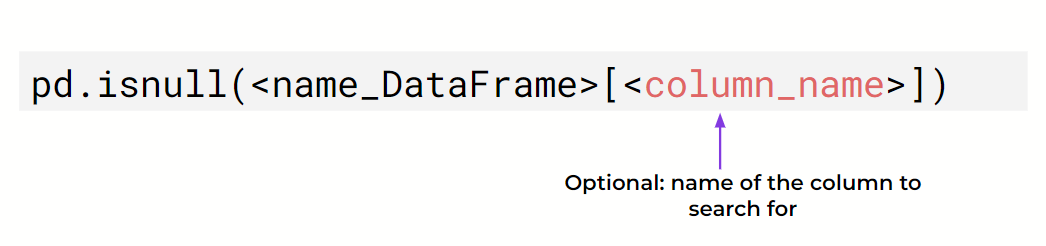

In [2]:
pd.isnull(df)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10836,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,True,False,False,False,False,False,False,False,False,False,False
10838,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
pd.isnull(df['Rating'])

,Rating
0,False
1,False
2,False
3,False
4,False
...,...
10835,False
10836,False
10837,True
10838,False


In [ ]:
# False --> gak null (ada valuenya)
pd.isnull(df['Rating']).tail()

,Rating
10835,False
10836,False
10837,True
10838,False
10839,False


In [6]:
# nampilin data yang ratingnya null
df[pd.isnull(df['Rating'])]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10823,10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10824,10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10830,10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10834,10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


## fillna()

The fillna() method is used to automatically replace all the null values in a dataset with a specific constant.

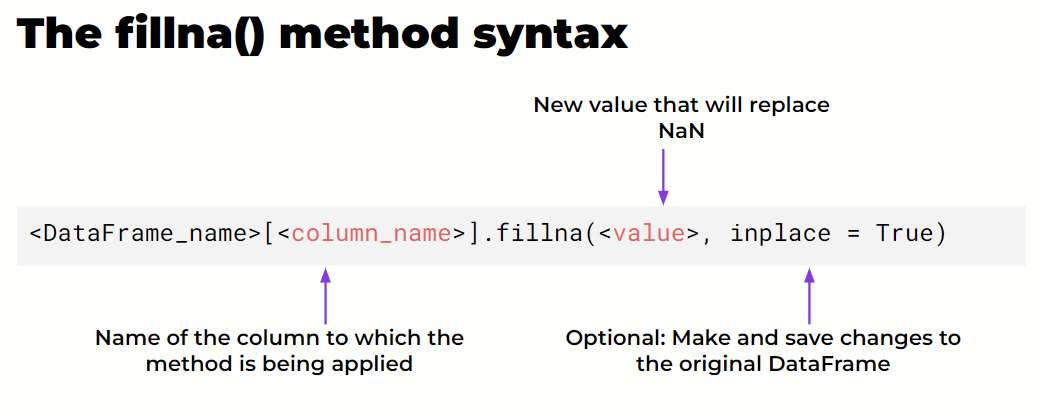

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10840 non-null  int64  
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          9366 non-null   float64
 4   Reviews         10840 non-null  int64  
 5   Size            10840 non-null  object 
 6   Installs        10840 non-null  object 
 7   Type            10839 non-null  object 
 8   Price           10840 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10840 non-null  object 
 11  Last Updated    10840 non-null  object 
 12  Current Ver     10832 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.2+ MB


In [14]:
# df['nama_kolom'].fillna(value_replace, inplace = True)
# rating yg NaN/null diganti jadi -1

# cara pertama
df['Rating'] = df['Rating'].fillna(-1)

# cara kedua
df['Rating'].fillna(-1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10840 non-null  int64  
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          10840 non-null  float64
 4   Reviews         10840 non-null  int64  
 5   Size            10840 non-null  object 
 6   Installs        10840 non-null  object 
 7   Type            10839 non-null  object 
 8   Price           10840 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10840 non-null  object 
 11  Last Updated    10840 non-null  object 
 12  Current Ver     10832 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.2+ MB


## dropna()

The dropna() method deletes all the rows containing at least one null value from the DataFrame.

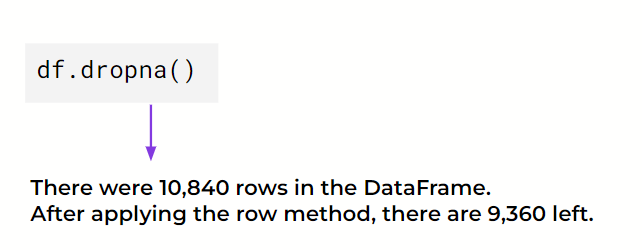

In [16]:
df.dropna(inplace=True) # ngehapus semua baris yg ada data kosongnya

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10829 non-null  int64  
 1   App             10829 non-null  object 
 2   Category        10829 non-null  object 
 3   Rating          10829 non-null  float64
 4   Reviews         10829 non-null  int64  
 5   Size            10829 non-null  object 
 6   Installs        10829 non-null  object 
 7   Type            10829 non-null  object 
 8   Price           10829 non-null  object 
 9   Content Rating  10829 non-null  object 
 10  Genres          10829 non-null  object 
 11  Last Updated    10829 non-null  object 
 12  Current Ver     10829 non-null  object 
 13  Android Ver     10829 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.2+ MB


## apply()

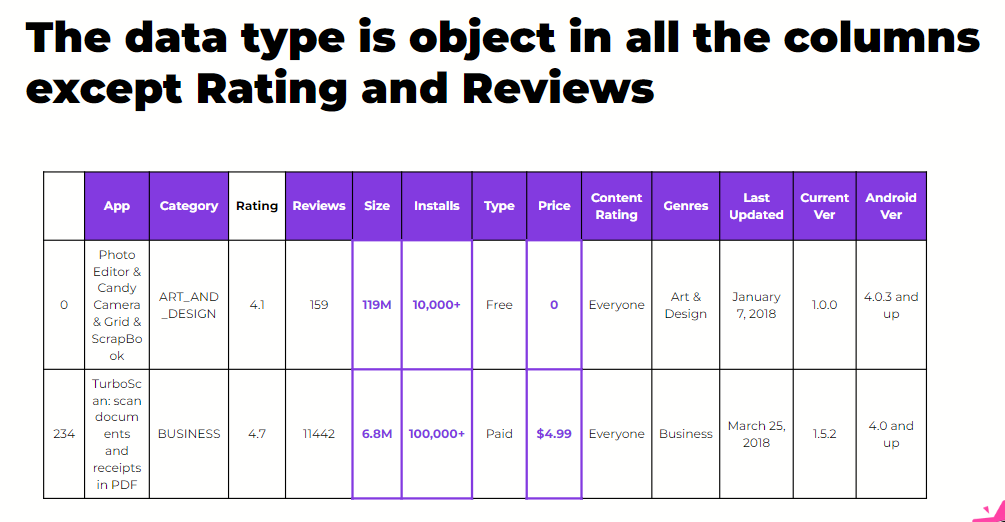

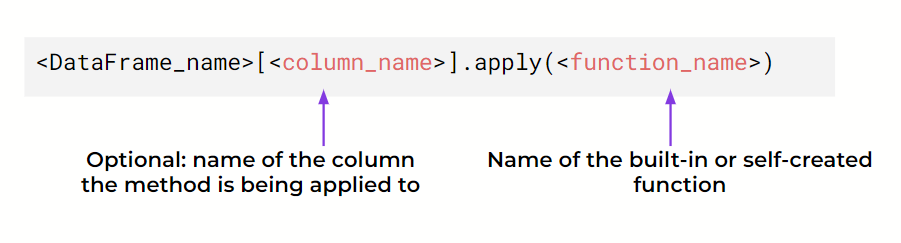

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10829 non-null  int64  
 1   App             10829 non-null  object 
 2   Category        10829 non-null  object 
 3   Rating          10829 non-null  float64
 4   Reviews         10829 non-null  int64  
 5   Size            10829 non-null  object 
 6   Installs        10829 non-null  object 
 7   Type            10829 non-null  object 
 8   Price           10829 non-null  object 
 9   Content Rating  10829 non-null  object 
 10  Genres          10829 non-null  object 
 11  Last Updated    10829 non-null  object 
 12  Current Ver     10829 non-null  object 
 13  Android Ver     10829 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.2+ MB


In [22]:
# apply fungsi int() ke kolom reviews
df['Reviews'] = df['Reviews'].apply(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10829 non-null  int64  
 1   App             10829 non-null  object 
 2   Category        10829 non-null  object 
 3   Rating          10829 non-null  float64
 4   Reviews         10829 non-null  int64  
 5   Size            10829 non-null  object 
 6   Installs        10829 non-null  object 
 7   Type            10829 non-null  object 
 8   Price           10829 non-null  object 
 9   Content Rating  10829 non-null  object 
 10  Genres          10829 non-null  object 
 11  Last Updated    10829 non-null  object 
 12  Current Ver     10829 non-null  object 
 13  Android Ver     10829 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.2+ MB


### Size, Install, Price

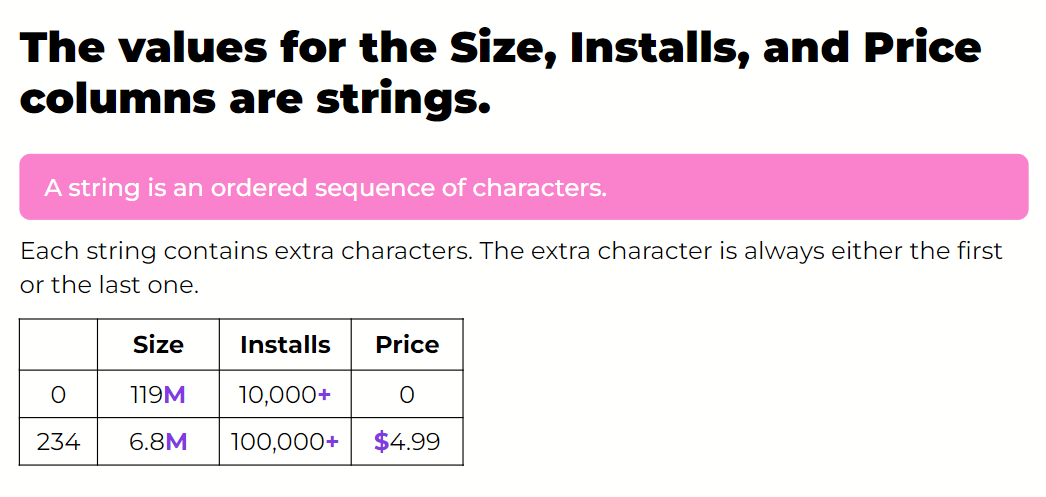

#### Price

diubah jadi float sama tulisan $ kita slice

In [ ]:
df[df['Price'] != '0'].head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


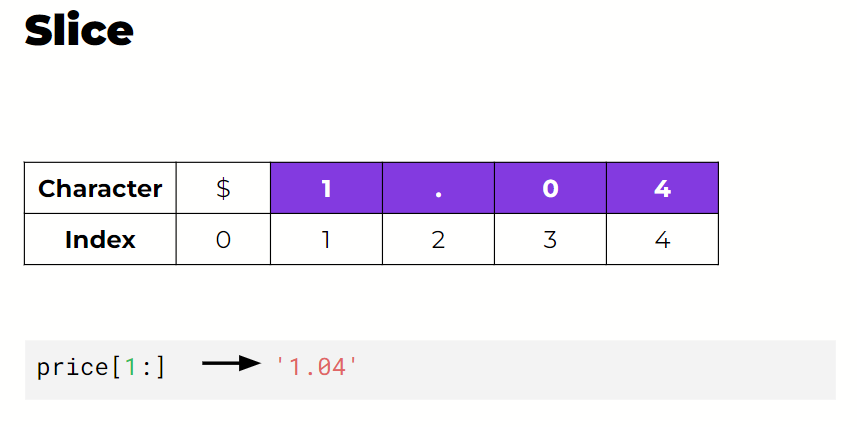

In [23]:
def price_to_float(price):
  if price[0] == '$':
    return float(price[1:]) # index ke 1 sampai terakhir (jadi float)
  else:
    return 0

# apply ke kolom 'Price'
df['Price'] = df['Price'].apply(price_to_float)

In [ ]:
# def make_price(price):
#   if price[0] == '$':
#     return float(price[1:]) # float dari index 1 sampe terakhir
#   else:
#     return 0

# # di apply ke kolom 'Price'
# df['Price'] = df['Price'].apply(make_price)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10829 non-null  int64  
 1   App             10829 non-null  object 
 2   Category        10829 non-null  object 
 3   Rating          10829 non-null  float64
 4   Reviews         10829 non-null  int64  
 5   Size            10829 non-null  object 
 6   Installs        10829 non-null  object 
 7   Type            10829 non-null  object 
 8   Price           10829 non-null  float64
 9   Content Rating  10829 non-null  object 
 10  Genres          10829 non-null  object 
 11  Last Updated    10829 non-null  object 
 12  Current Ver     10829 non-null  object 
 13  Android Ver     10829 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.2+ MB


In [25]:
df.tail()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10835,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,10838,Parkinson Exercices FR,MEDICAL,-1.0,3,9.5M,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10839,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


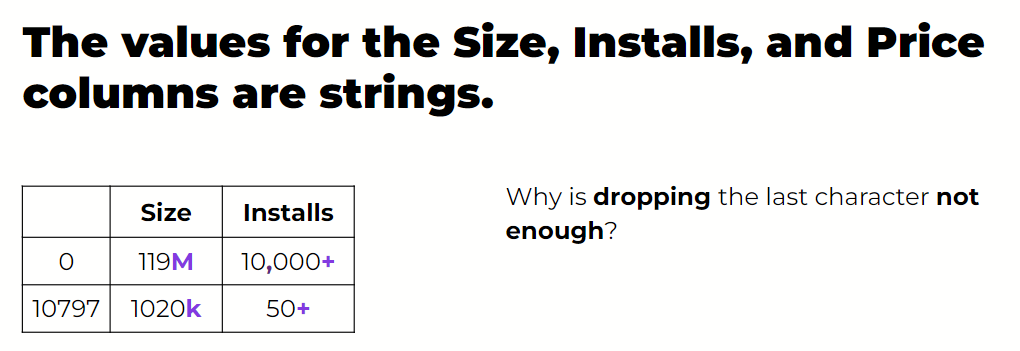

#### Size

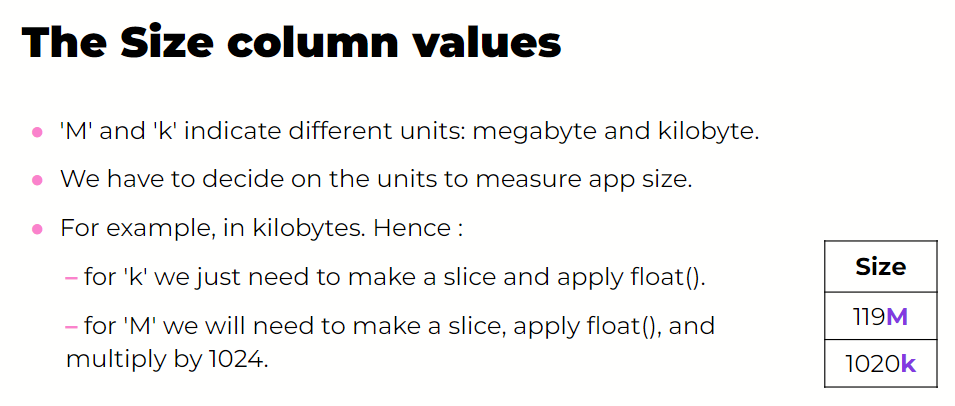

In [26]:
# 1 MB = 1024 kB
# mau dijadiin kB

def size_to_kb(size):
  if size[-1] == 'k': # index terakhir --> 'k' => kb
    return float(size[:-1]) # jadi float --> dari index 0 sampai sebelum terakhir
  elif size[-1] == 'M': # mb
    return float(size[:-1]) * 1024
  else:
    return 0

# apply
df['Size'] = df['Size'].apply(size_to_kb)

In [ ]:
# # diubah jadi kb semua
# def make_size(size):
#   if size[-1] == 'k':
#     return float(size[:-1])
#   elif size[-1] == 'M':
#     return float(size[:-1]) * 1024
#   else:
#     return 0

# # apply
# df['Size'] = df['Size'].apply(make_size)


In [ ]:
# def make_size(size):
#   if size[-1] == 'k':
#     return float(size[:-1])
#   elif size[-1] == 'M':
#     return float(size[:-1]) * 1024
#   return 0

# def make_size(size):
#   if size[-1] == 'k':
#       return float(size[:-1]) # di-slice --> dari index 0 sampe sebelum index terakhir
#   elif size[-1] == 'M':
#       return float(size[:-1]) * 1024
#   return 0 # lainnya jadi 0

In [27]:
# di apply ke kolom 'Size'
# df['Size'] = df['Size'].apply(make_size)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10829 non-null  int64  
 1   App             10829 non-null  object 
 2   Category        10829 non-null  object 
 3   Rating          10829 non-null  float64
 4   Reviews         10829 non-null  int64  
 5   Size            10829 non-null  float64
 6   Installs        10829 non-null  object 
 7   Type            10829 non-null  object 
 8   Price           10829 non-null  float64
 9   Content Rating  10829 non-null  object 
 10  Genres          10829 non-null  object 
 11  Last Updated    10829 non-null  object 
 12  Current Ver     10829 non-null  object 
 13  Android Ver     10829 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.2+ MB


In [ ]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Installs

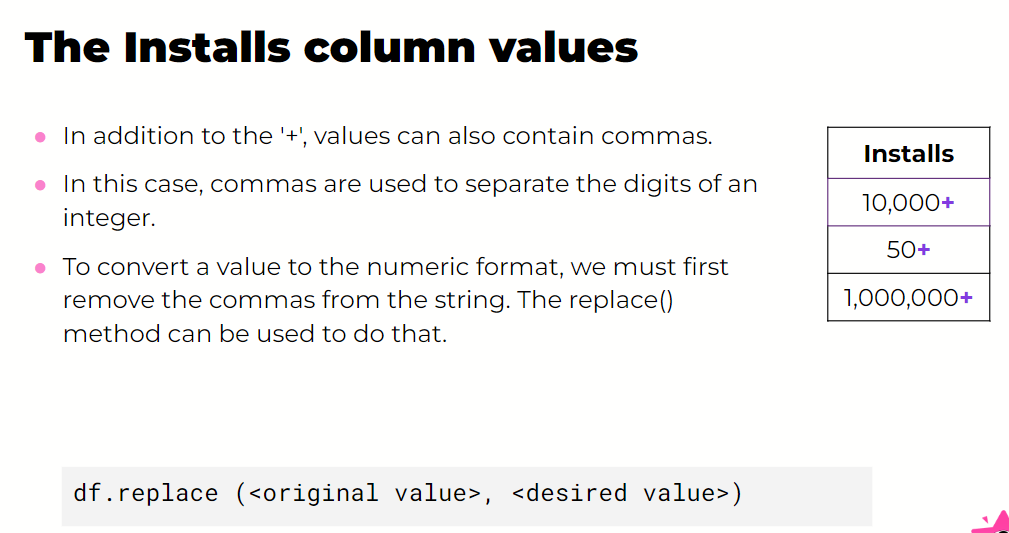

In [28]:
def install_to_int(install):
  if install == '0':
    return 0
  else:
    install = install[:-1].replace(',', '') # index terakhirnya dipotong, ',' dihapus
    return int(install)

df['Installs'] = df['Installs'].apply(install_to_int)

In [ ]:
# def make_installs(install):
#   if install == '0':
#     return 0
#   else:
#     return int(install[:-1].replace(',', ''))

# # apply
# df['Installs'] = df['Installs'].apply(make_installs)

In [ ]:
# def make_installs(install):
#   if install == '0':
#     return 0
#   return int(install[:-1].replace(',', ''))

# def set_installs(installs):
#    if installs == '0':
#        return 0
#    return int(installs[:-1].replace(',', ''))

# df['Installs'] = df['Installs'].apply(make_installs)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10829 non-null  int64  
 1   App             10829 non-null  object 
 2   Category        10829 non-null  object 
 3   Rating          10829 non-null  float64
 4   Reviews         10829 non-null  int64  
 5   Size            10829 non-null  float64
 6   Installs        10829 non-null  int64  
 7   Type            10829 non-null  object 
 8   Price           10829 non-null  float64
 9   Content Rating  10829 non-null  object 
 10  Genres          10829 non-null  object 
 11  Last Updated    10829 non-null  object 
 12  Current Ver     10829 non-null  object 
 13  Android Ver     10829 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.2+ MB


In [ ]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.iloc[3]

,3
Unnamed: 0,3
App,Sketch - Draw & Paint
Category,ART_AND_DESIGN
Rating,4.5
Reviews,215644
Size,25600.0
Installs,50000000
Type,Free
Price,0.0
Content Rating,Teen


# Feature engineering

Feature engineering is the process of creating new features from existing data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10840 non-null  int64  
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          10840 non-null  float64
 4   Reviews         10840 non-null  int64  
 5   Size            10840 non-null  float64
 6   Installs        10840 non-null  int64  
 7   Type            10839 non-null  object 
 8   Price           10840 non-null  float64
 9   Content Rating  10840 non-null  object 
 10  Genres          10840 non-null  object 
 11  Last Updated    10840 non-null  object 
 12  Current Ver     10832 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.2+ MB


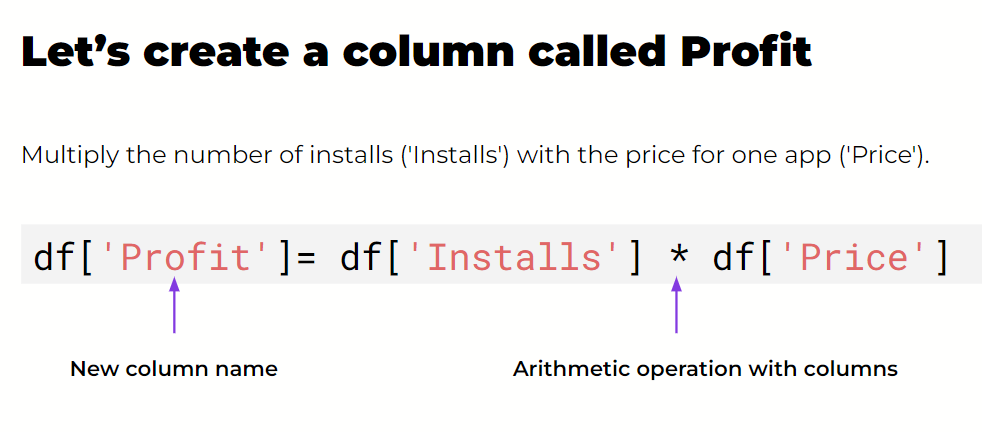

In [ ]:
df['Profit'] = df['Installs'] * df['Price']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10840 non-null  int64  
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          10840 non-null  float64
 4   Reviews         10840 non-null  int64  
 5   Size            10840 non-null  float64
 6   Installs        10840 non-null  int64  
 7   Type            10839 non-null  object 
 8   Price           10840 non-null  float64
 9   Content Rating  10840 non-null  object 
 10  Genres          10840 non-null  object 
 11  Last Updated    10840 non-null  object 
 12  Current Ver     10832 non-null  object 
 13  Android Ver     10838 non-null  object 
 14  Profit          10840 non-null  float64
dtypes: float64(4), int64(3), object(8)
memory usage: 1.2+ MB


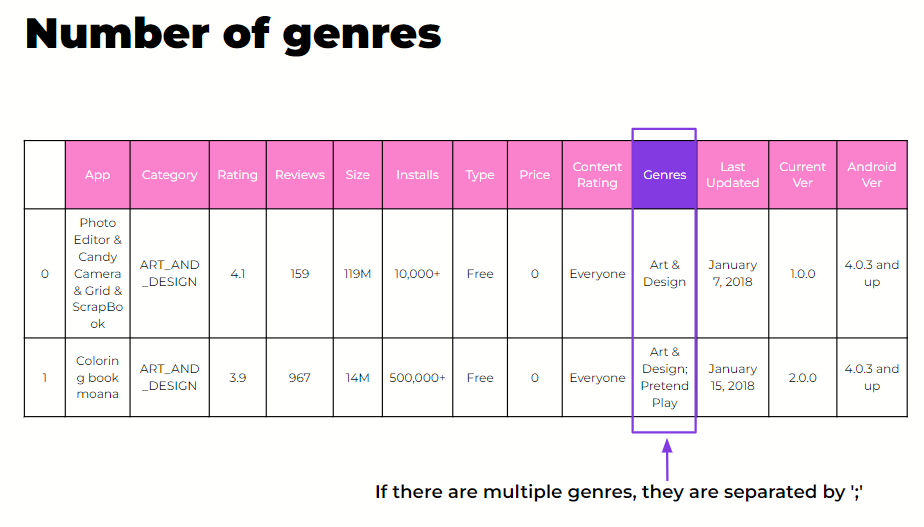

In [ ]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Profit
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0


## split()

**The split() method** splits the string into parts using a special delimiter and returns the parts of the string as a list.

In [ ]:
def count_genres(genre):
  genre = genre.split(';') # misahin string dengan ; --> list
  return len(genre) # list

df['Jumlah_Genre'] = df['Genres'].apply(count_genres)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10840 non-null  int64  
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          10840 non-null  float64
 4   Reviews         10840 non-null  int64  
 5   Size            10840 non-null  float64
 6   Installs        10840 non-null  int64  
 7   Type            10839 non-null  object 
 8   Price           10840 non-null  float64
 9   Content Rating  10840 non-null  object 
 10  Genres          10840 non-null  object 
 11  Last Updated    10840 non-null  object 
 12  Current Ver     10832 non-null  object 
 13  Android Ver     10838 non-null  object 
 14  Profit          10840 non-null  float64
 15  Num_genres      10840 non-null  int64  
 16  Jumlah_Genre    10840 non-null  int64  
dtypes: float64(4), int64(5), object

In [ ]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Profit,Num_genres,Jumlah_Genre
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0,1,1
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,2,2
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0,1,1
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0,1,1
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0,2,2


# Code Solutions

## 1 Data Cleaning

In [ ]:
import pandas as pd
df = pd.read_csv('GooglePlayStore_wild.csv')

# Print information about the entire DataFrame to see which columns need to be cleaned
# Print information about the entire DataFrame to see which columns need to be cleaned
print(df.info())

# How many apps in the dataset have no ('NaN') rating ('Rating')?
no_rating = len(df[pd.isnull(df['Rating'])])
print(no_rating)

# Replace the null value ('NaN') of the rating ('Rating') for such apps with -1.
df['Rating'].fillna(-1, inplace = True)

# Determine what other size value ('Size') is stored in the dataset besides Kilobytes and Megabytes, and replace it with -1.
# Convert the app sizes ('Size') to number format (float). The sizes of all the apps must be measured in Megabytes.

print(df['Size'].value_counts())

def set_size(size):
    if size[-1] == 'M': # cek elemen terakhir
        return float(size[:-1]) # ambil semua elemen kecuali elemen terakhir --> jadi float
    elif size[-1] == 'k':
        return float(size[:-1]) / 1024
    return -1

df['Size'] = df['Size'].apply(set_size) # apply

# What is the maximum 'Size' of apps in the 'TOOLS' 'Category'?
print(df[df['Category'] == 'TOOLS']['Size'].max())

# Bonus tasks
# Replace the data type with integer (int) for the number of installs ('Installs').
# In the entry for the number of installs ('Installs'), the “+” sign must be ignored.
# This means that if the number of installs in the dataset is 1,000,000+, you need to change the value to 1000000
def set_installs(installs):
    if installs == '0':
        return 0
    return int(installs[:-1].replace(',', '')) # index terakhir di ignore & ',' dihapus

df['Installs'] = df['Installs'].apply(set_installs)

# 3 Group the data by 'Category' and target audience ('Content Rating') however you prefer
# calculate the average number of installs ('Installs') for each group. Round the answer to the nearest tenth.
# In the resulting table, find the cell with the largest value.
# What age group and app type does the data in that cell belong to?
res = df.pivot_table(index = 'Content Rating', columns = 'Type', values = 'Installs', aggfunc = 'mean')
print(round(res), 1)

print()

# Which app doesn’t have a 'Type' specified? What type should be entered there depending on the price?
print(df[pd.isnull(df['Type'])])

print()

# You can use iloc[0] to see all the columns instead of the ellipsis.
print(df[pd.isnull(df['Type'])].iloc[0])
df['Type'].fillna('Free', inplace = True)

# Print information about all the DataFrames to make sure the cleaning is successful
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10840 non-null  int64  
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Rating          9366 non-null   float64
 4   Reviews         10840 non-null  int64  
 5   Size            10840 non-null  object 
 6   Installs        10840 non-null  object 
 7   Type            10839 non-null  object 
 8   Price           10840 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10840 non-null  object 
 11  Last Updated    10840 non-null  object 
 12  Current Ver     10832 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.2+ MB
None
1474
Size
Varies with device    1695
11M                    198
12M                    196
14M         

## 2 Feature Engineering

In [ ]:
import pandas as pd
df = pd.read_csv('GooglePlayStore_wild.csv')

# Cleaning data from the first task
# rating
df['Rating'].fillna(-1, inplace = True)

# size
def set_size(size):
    if size[-1] == 'M':
        return float(size[:-1])
    elif size[-1] == 'k':
        return float(size[:-1]) / 1024
    return -1

df['Size'] = df['Size'].apply(set_size)

# install
def set_installs(installs):
    if installs == '0':
        return 0
    return int(installs[:-1].replace(',', ''))

df['Installs'] = df['Installs'].apply(set_installs)

# type
df['Type'].fillna('Free', inplace = True)

# Replace the data type with a fractional number (float) for the app prices ('Price')
def make_price(price):
    if price[0] == '$':
        return float(price[1:])
    return 0

df['Price'] = df['Price'].apply(make_price)

# Calculate how many dollars the developers earned on each paid app
df['Profit'] = df['Installs'] * df['Price']

# What is the maximum profit ('Profit') among the paid apps (Type == 'Paid')?
print(df[df['Type'] == 'Paid']['Profit'].max())

# Create a new column that will store the number of genres. Call it 'Number of genres'
def split_genres(data):
    return data.split(';')
    # return len(data)

# df['Num_genres'] = df['Genres'].apply(count_genres)
df['Genres'] = df['Genres'].apply(split_genres)
df['Number of genres'] = df['Genres'].apply(len)

# What is the maximum 'Number of genres' stored in the dataset?
print(df['Number of genres'].max())

# Bonus task
# Create a new column storing the season in which the app was 'Last Updated'. Call it 'Season'
def set_season(date):
    month = date.split()[0] # kata pertama

    seasons = {'Winter': ['December', 'January', 'February'],
                'Spring': ['March', 'April', 'May'],
                'Summer': ['June', 'July', 'August'],
                'Autumn': ['September', 'October', 'November']}

    for season in seasons:
        if month in seasons[season]:
            return season

    return 'Season not identified'

df['Season'] = df['Last Updated'].apply(set_season)

# Display the seasons and how many there are in the dataset
print(df['Season'].value_counts())


69900000.0
2
Season
Summer    6030
Spring    2261
Winter    1450
Autumn    1099
Name: count, dtype: int64
